<br>

# Singular Value Decomposition (SVD)

---

   - Introduction to Singular Value Decomposition
   
   - Properties of SVD
   
   - Pseudo-inverse
   
   - Inconsistent and Underdetermined Systems
   
   - Dimensionality Reduction using SVD
   
   - Application: Image compression

**References**:

[Brunton et al. Data Driven Science and Engineering-Chapter 1 online](https://www.cambridge.org/core/books/datadriven-science-and-engineering/singular-value-decomposition-svd/3867B61771D37761ED00AD5AC7C25DA9)

[SVD Notes from MIT, Dr. Strang](https://math.mit.edu/classes/18.095/2016IAP/lec2/SVD_Notes.pdf)

In [1]:
#IMPORT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## We are using these lines of code several time.
## We are making this a function therefore. This also take care of clippign warnings.
def display_image(arr_image,color_map=None,dim=(10,20)):
    arr_image = (arr_image - np.min(arr_image))/(np.max(arr_image) - np.min(arr_image))
    arr_image = np.uint8(arr_image*255)
    plt.figure(figsize=dim)
    plt.axis('off')
    plt.imshow(arr_image, cmap=color_map)
    plt.show()

---

### Singular Value Decomposition (SVD)

<div class="alert alert-success">
<strong>Theorem: Singular Value Decomposition</strong>
    
Any arbitrary matrix $A \in \mathbb{R}^{m \times n}$ can be factored as 
$$ {\LARGE
A = U\Sigma V^T
}
$$
where $U$ is an $m \times m$ orthogonal matrix, $\Sigma$ is an $m \times n$ real diagonal matrix, and $V$ is an $n \times n$ orthogonal matrix. 
</div>

- The rectangular diagonal matrix $\Sigma$ for matrix $A$ of rank $r \le \min\{m,\; n \}$ could be given by

$$\large
\Sigma=\begin{bmatrix}
\sigma_1 & 0 &\cdots & 0&0 & \cdots\\
0 &\sigma_2  &\cdots & 0&0 & \cdots\\
\vdots &\vdots &\ddots & \vdots&\vdots & \vdots\\
0&0 &\cdots & \sigma_r&0 & \cdots\\
0 &0 &\cdots & 0&0 & \cdots\\
\vdots &\vdots &\cdots & \vdots & \vdots & \ddots
\end{bmatrix} = \textrm{diag}(\sigma_1, \sigma_2, \cdots, \sigma_r, 0, \cdots, 0) \in \mathbb{R}^{m \times n}
$$

where $\sigma_i \geq 0$ are called <font color=blue>singular values</font> of $A$ and are ordered as $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_r \geq 0$.
    
<br>

- The columns of $U=[U_1\ \ U_2\ \ \cdots U_m]$ are called <font color=blue>left singular vectors</font> of $A$.

- The columns of $V=[V_1 \ \ V_2 \ \ \cdots V_n]$ are called <font color=blue>right singular vectors</font> of $A$.
---
<br>

**When $m < n$**

<img src="https://live.staticflickr.com/65535/52739076805_7eb6e38e16_k.jpg" width="2048" height="524" alt="SVDWide"/>

---

**When $m > n$**

<img src="https://live.staticflickr.com/65535/52738146997_62025eac6f_k.jpg" width="2048" height="611" alt="SVDTall"/>

---

### The Geometry of SVD: 

#### Decomposition into a sequence of rotation, scaling, and rotation transformations.

<img src="https://live.staticflickr.com/65535/52738954559_6ec5b61866_c.jpg" width="90%">




### Economic (or Reduced) SVD

<div class="alert alert-success">
Any arbitrary matrix $A \in \mathbb{R}^{m \times n}$ that has rank $r$ can be factored as 
$$A = U_{(r)}\Sigma_{(r)} V_{(r)}^T
=[U_1\ \ U_2 \ \cdots \ U_r]
\begin{bmatrix}
\sigma_1 & \cdots & 0\\ 
\vdots & \ddots & \vdots\\
0 & \cdots & \sigma_r
\end{bmatrix}
[V_1\ \ V_2 \ \cdots \ V_r]^T
$$
where $U_{(r)}$ is an $m \times r$  matrix having orthonormal columns, $\Sigma_{(r)}$ is an $r \times r$ diagonal matrix of singular values arranged in a non-increasing order, and $V_{(r)}$ is an $n \times r$  matrix having orthonormal columns. 
</div>
<div class="alert alert-block alert-danger">
Note that $U_{(r)}$ and $V_{(r)}$ are not orthogonal matrices because they are not square matrices. They are called orthogonormal column (ONC) matrices.
</div>

- The diagonal matrix $\Sigma_{(r)}$ is a square matrix given by
$$
\Sigma_{(r)}  = \textrm{diag}(\sigma_1,\, \sigma_2,\, \cdots, \,\sigma_r) \in \mathbb{R}^{r \times r}
$$
<br>

#### Outer Product Form of Economic SVD 

$$\large
\bbox[20px, #90caf9, border: 1px solid gray]{
A = \sigma_1U_1 V_1^T +  \sigma_2 U_2 V_2^T + \cdots +  \sigma_r U_r V_r^T =  \ \sum_{k=1}^{r} \sigma_k \, U_k V_k^T
}
$$


---


#### Properties of SVD
>- The eigendecomposition of $A^TA$ follows from the SVD as 
$$\bbox[20px, #90caf9, border: 1px solid gray]{
A = U \Sigma V^T \implies A^TA = V\hat{\Sigma} V^T.
}
$$
  where
  $$
  \hat{\Sigma} =\text{diag} \left(\sigma_1^2,\,\sigma_2^2,\, \cdots,\,\sigma_r^2,\,  0,\,\cdots \right) \in \mathbb{R}^{n \times n}
  $$
   This means that the squares of singular values, $\sigma_i^2$, are the eigenvalues of $A^TA$  having associated eigenvectors $V_i$, where $V_i$ is the $i$-th column of matrix $V$,  right singular vectors of $A$.


>- The eigendecomposition of $AA^T$ also follows from the SVD as
$$\bbox[20px, #90caf9, border: 1px solid gray]{
A = U \Sigma V^T \implies  AA^T = U\tilde{\Sigma} U^T.
}
$$
  where
  $$
  \tilde{\Sigma} =\text{diag}\left(\sigma_1^2,\,\sigma_2^2,\, \cdots,\,\sigma_r^2,\,  0,\,\cdots \right) \in \mathbb{R}^{m \times m}
  $$
This means that the squares of singular values, $\sigma_i^2$, are also the eigenvalues of $A A^T$  having associated eigenvectors $U_i$, left singular vectors of $A$.


>- An immediate conclusion from the SVD is

$$\bbox[20px, #90caf9, border: 1px solid gray]{
A = U\Sigma V^T \iff AV = U \Sigma \implies AV_i = \sigma_i U_i \quad \text{ and similarly }\quad  A^T U_j = \sigma_j V_j.
}
$$


**Example** 

<br>

<span style='font-size:50px;'>&#129300;</span>
Use SVD of $A$ to prove the following
$$
\| A\|^2_F = \sigma_1^2+\sigma_2^2+\cdots+\sigma_r^2.
$$
<br>
**Example** 

<br>

<span style='font-size:50px;'>&#129300;</span>
Prove the following
$$
\| A\|_2 = \sqrt{\rho(A^TA)}  = \sqrt{\max\limits_{1 \leq i \leq n} |\lambda_i (A^TA)| }=\max\limits_{1 \leq i \leq n} \sigma_i = \sigma_1.
$$

### Applications of SVD
---

#### Pseudo-inverse (Moore-Penrose Inverse)

The pseudo-inverse of a rectangular matrix $A \in \mathbb{R}^{m \times n}$ of rank $r$, whose SVD is given by $A = U \Sigma V^T$, is a unique rectangular matrix $A^+ \in \mathbb{R}^{n \times m}$, given by

$$\large 
\bbox[20px, #90caf9, border: 1px solid gray]{
A^+ = V \Sigma^+ U^T
}
$$
where
$$\large
\Sigma^+ = \textrm{diag}\left(\frac{1}{\sigma_1},\ \frac{1}{\sigma_2},\ \cdots,\ \frac{1}{\sigma_r},\ 0,\ \cdots,\ 0\right) \in \mathbb{R}^{n \times m}
$$


#### Application: Inconsistent and Underdetermined Systems

Given a linear system of equations $A\mathbf{x} = \mathbf{b}$ where $A$ is a rectangular matrix of order $m \times n$, <font color = blue>a  minimal solution </font> could be defined in each of the following cases.

- Consistent with unique solution $\mathbf{x}$: The minimal solution is $\mathbf{x}$.


- Consistent with a set of solutions : The minimal solution is the one with smallest $\|\mathbf{x}\|_2$.


- Inconsistent with unique least-square solution $\mathbf{x}$: The minimal solution is $\mathbf{x}$.


- Inconsistent with a set of least-square solutions: The minimal solution is the one with smallest $\|\mathbf{x}\|_2$.

<div class="alert alert-block alert-success">
The <strong>minimal solution</strong> of any rectangular system of linear equations $A \mathbf{x} = \mathbf{b}$ can be given by using the pseudo-inverse of $A$ as
$$
\mathbf{x} = A^+\mathbf{b}.
$$
</div>


### Application: Fundamental Subspaces

SVD provides orthnormal bases for the four fundamental subspaces of the matrix $A$.

$$
\bbox[20px, #90caf9, border: 1px solid gray]{
A = [\underbrace{U_1 \ \ U_2 \ \ \cdots \ \ U_r \  }_{\textbf{column space of  }A} \  \underbrace{U_{r+1}\ \ \cdots \  \ U_m \  }_{\textbf{left-null space of  }A}] \begin{bmatrix}
\sigma_1 & \cdots & 0\\ 
\vdots & \ddots & \vdots\\
0 & \cdots & *
\end{bmatrix}
[\underbrace{V_1 \ \ V_2 \ \ \cdots \ \ V_r \  }_{\textbf{row space of  }A} \  \underbrace{V_{r+1}  \ \ \cdots \ \ V_n \  }_{\textbf{null space of  }A}]^T
}
$$

**Properties of SVD**
>- Rank of $A$ is $r$, the number of non-zero singular values.


>- The set $\{ U_{1}\ U_{2}\ \cdots\ U_{r} \}$ forms an orthonormal basis for the range or column space of $A$.


>- The set $\{ U_{r+1}\ U_{r+2}\ \cdots \ U_{m} \}$ forms an orthonormal basis for the null space of $A^T$.


>- The set $\{ V_{1} \ V_{2} \ \cdots \ V_{r} \}$ forms an orthonormal basis for the row-space of $A$.


>- The set $\{ V_{r+1} \ V_{r+2} \ \cdots \ V_{n} \}$ forms an orthonormal basis for the null space of $A$.



---

#### SVD in NumPy

In [44]:
# Create a random matrix and find its SVD
A = np.random.randn(4,5)
U, S, V = np.linalg.svd(A)

In [45]:
U

array([[ 0.56582843,  0.39466667,  0.65521922, -0.30783792],
       [ 0.18158012,  0.63619776, -0.20055091,  0.72253748],
       [-0.45536049, -0.18340249,  0.72832054,  0.47807902],
       [ 0.66295828, -0.63706684, -0.00403828,  0.39321223]])

In [46]:
S

array([3.35849029, 2.65960935, 1.58949802, 0.27452065])

In [47]:
V

array([[ 0.20326858,  0.7297544 , -0.19999591, -0.53801832, -0.31093137],
       [ 0.55828038,  0.21819056,  0.74543409,  0.06555246,  0.2841598 ],
       [ 0.65220255, -0.12107096, -0.61789137,  0.07144708,  0.41602792],
       [ 0.38515768, -0.6141146 ,  0.12729786, -0.4349717 , -0.51875977],
       [-0.27072182, -0.16750067,  0.07959376, -0.7154957 ,  0.61675276]])

#### Stability of eigenvalues vs. singular values calculations

In [3]:
A = np.array([[0,1,0,0],
              [0,0,2,0],
              [0,0,0,3],
              [0.000001,0,0,0]])
print(A)
print("The eigenvalues of A are:\n",np.linalg.eigvals(A))
_,sigmas,_=np.linalg.svd(A)
print("The singular values are:\n",sigmas)

[[0.e+00 1.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 2.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 3.e+00]
 [1.e-06 0.e+00 0.e+00 0.e+00]]
The eigenvalues of A are:
 [-0.04949232+0.j          0.        +0.04949232j  0.        -0.04949232j
  0.04949232+0.j        ]
The singular values are:
 [3.e+00 2.e+00 1.e+00 1.e-06]


**Observations**: From the above example, we notice that a small change in a square matrix can drastically alter the eigenvalues of the matrix; however, the singular values only change by small amounts.

### Application: Reduced Rank approximation
---
<img src="https://live.staticflickr.com/65535/52738808167_a2523c6585_z.jpg" width="80%" alt="TruncatedSVD"/>

Correction: in the above image '$=$' should be replaced by '$\approx$'.

### Truncated SVD

$$\LARGE
\bbox[20px, #90caf9, border: 1px solid gray]{
A \approx A_{(k)}:=U_{(k)}\; \Sigma_{(k)}\; V^T_{(k)} =   \sum_{i=1}^{k} \sigma_i\; U_i\; V_i^T
}
$$

<br>

<div class="alert alert-block alert-success">
<strong>Eckart-Young Theorem</strong>
    
Assume that the matrix $A$ has a rank $r > k$. Then the solution of the matrix approximation problems
$$\large 
\min\limits_{rank(X) = k} \|A-X\|^2_F
$$
is given by 
    $$\large
    X =U_{(k)} \; \Sigma_{(k)}\;  V^T_{(k)}  
    $$

The minimum value of the aproximation error is 
    $$\large
    \|A - A_{(k)}\|_F^2 = \sigma_{k+1}^2+\cdots +\sigma_r^2.$$
    </div>

<div class="alert alert-success">
<strong> Projection</strong> 
    
The orthogonal-projection matrix that projects any vector $\mathbf{x} \in \mathbb{R}^m$ onto the reduced-rank column space of $A_{(k)}$ is given by
    $$P = U_{(k)}\; U_{(k)}^T$$
    
It could be shown that $A_{(k)}= U_{(k)}\; U_{(k)}^T\; A$.
</div>

##### A discussion on Shatten's p-norm.

[A comprehensive review of all norms](http://fourier.eng.hmc.edu/e161/lectures/algebra/node12.html#:~:text=Induced%20or%20operator%20norms%20of%20a%20matrix%20is,is%20the%20least%20upper%20bound%20of%20the%20function.)

### Application: Image compression using SVD


[Image Source](https://www.millcreekvet.com/spay-and-neutering-your-pet/)

Original order of the image tensor: (2460, 4200, 3)


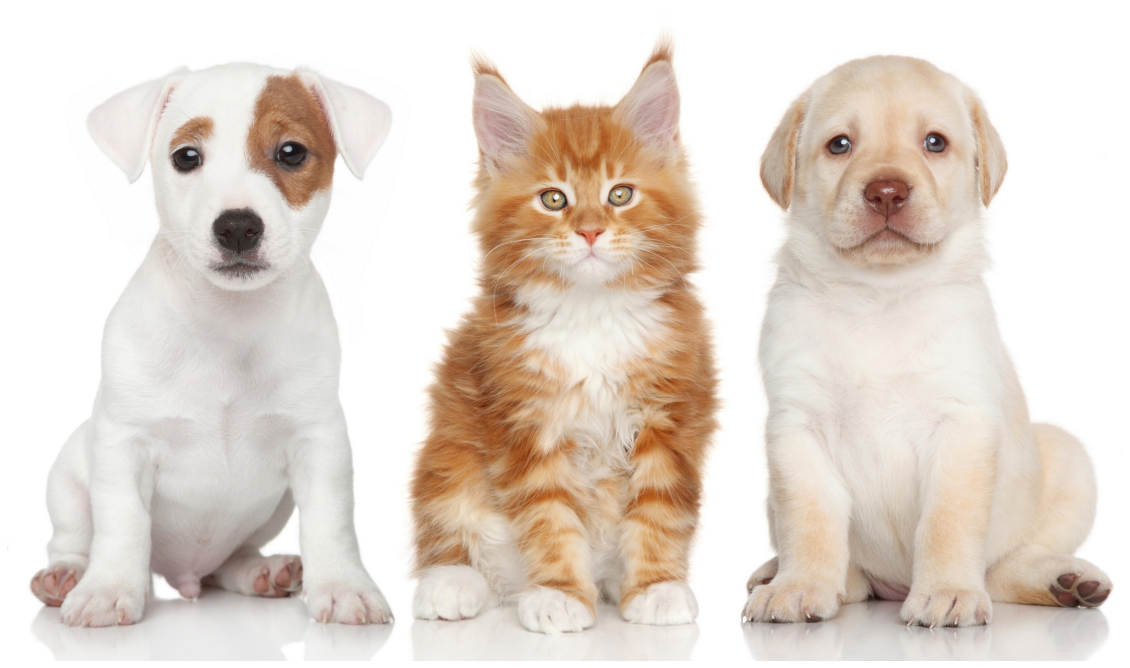

In [2]:
## Following code has been copied from Week 1 notebook
pix = mpimg.imread("./images/Animals1.jpeg") # OR BabyYodaDoll.jpg, BabyYodaXmas

print ("Original order of the image tensor:", pix.shape)
display_image(pix,dim=(20,30))

In [4]:
## SVD of the red, green and blue channels separately
pix_rgb = pix/255.0;
U0,S0,V0 = np.linalg.svd(pix_rgb[...,0]);
U1,S1,V1 = np.linalg.svd(pix_rgb[...,1]);
U2,S2,V2 = np.linalg.svd(pix_rgb[...,2]);

In [5]:
S0.shape
print("The first few singular values of the red channe are:\n",S0[0:50])

The first few singular values of the red channe are:
 [2863.09483988  140.8008034   132.73223525  130.64726369   92.38971686
   70.9600264    67.03962604   55.3912609    50.17704367   43.03293686
   38.01955944   36.33237341   33.75710549   31.38796974   28.90012267
   27.65761703   24.17543694   22.79243367   21.58535723   21.21073046
   19.94611281   19.3366691    18.41743974   17.09732933   16.72245342
   15.75581132   15.14059804   14.51297855   13.96458822   13.60680515
   13.1379383    12.91931695   12.63201418   12.38715135   11.90511638
   11.30911094   11.08995233   10.96310294   10.61658636   10.5725058
   10.34639561    9.82439983    9.65809203    9.47932535    9.03376766
    8.86543834    8.67317316    8.46937055    8.34912       8.25493676]


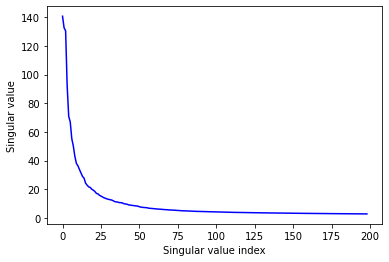

In [8]:
plt.plot(S0[1:200],'b-')
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.show()

In [11]:
## Reconstruction of the image from fewer components from the SVD
pix_compressed = np.zeros_like(pix_rgb);
k=100
pix_compressed[...,0] = np.dot(U0[:,:k], V0[:k,:]*S0[:k].reshape(k,1));
pix_compressed[...,1] = np.dot(U1[:,:k], V1[:k,:]*S1[:k].reshape(k,1));
pix_compressed[...,2] = np.dot(U2[:,:k], V2[:k,:]*S2[:k].reshape(k,1));

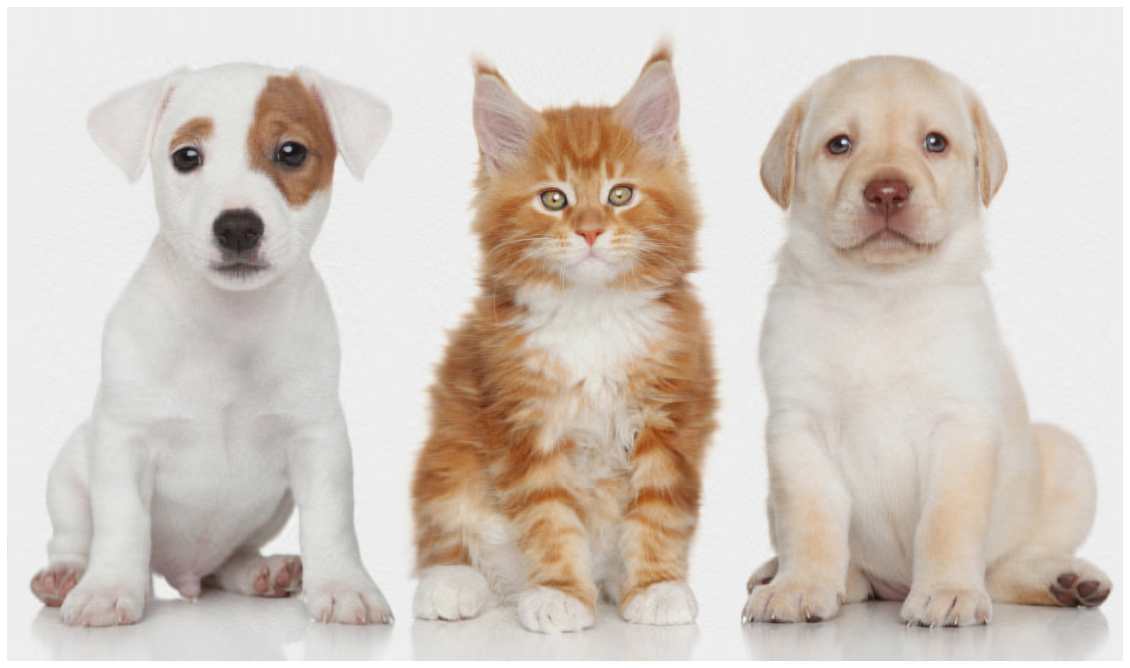

In [12]:
## Display the reconstructed images
display_image(pix_compressed,dim=(20,30))

### Image compression of by using TrancatedSVD

Order of the gray-scale image matrix: (2460, 4200)


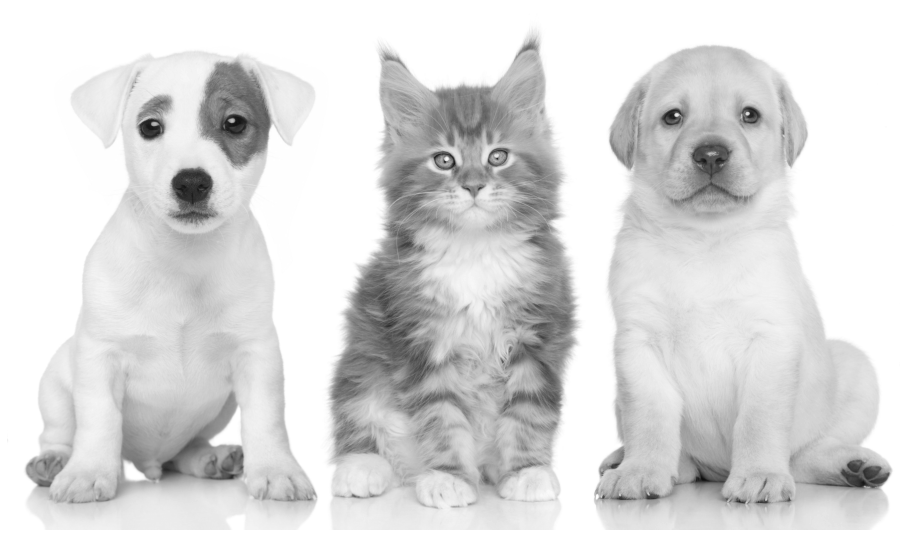

In [3]:
## Image compression after conversion to a gray-scale image
color_weight = [0.2, 0.7, 0.1];
pix_gray = np.dot(pix[...,:3], color_weight)/255 # Note conversion to gray-scale is not unique
print ("Order of the gray-scale image matrix:", pix_gray.shape)
display_image(pix_gray,color_map='gray',dim=(16,24))

In [4]:
## SVD of the matrix
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=50)
comps = tsvd.fit_transform(pix_gray);
comps.shape

(2460, 50)

In [18]:
Vt = tsvd.components_
S = tsvd.singular_values_
Vt.shape

(50, 4200)

<br>
<span style='font-size:50px;'>&#129300;</span> Ask ChatGPT about the advantages of using Truncated SVD over SVD.

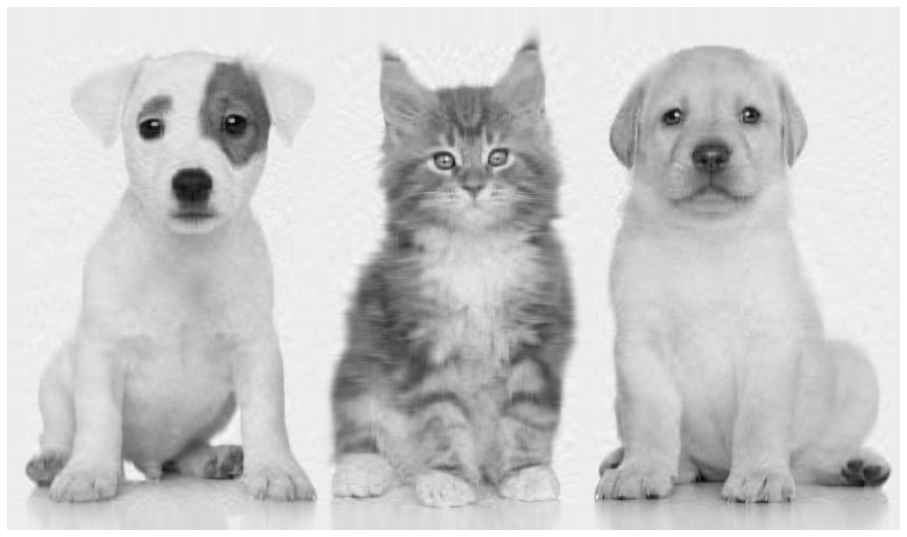

In [71]:
#k=50
#pix_gray_compressed = np.dot(U[:,:k], V[:k,:]*S[:k].reshape(k,1));
low_rank_pix= tsvd.inverse_transform(comps)
display_image(low_rank_pix,color_map='gray',dim=(16,24))

### Application: Video compression
<br>
<span style='font-size:50px;'>&#129300;</span>
Discuss  with your group/classmates how a 10 minute long 1080p-24fps video (no sound) could be compressed using SVD. You could be asked to explain how.

### Matrix Completion Problems 
---
The matrix completion problem is a fundamental problem in the field of machine learning and data science. We have a matrix with missing entries and partial obserations. The goal is to fill in the missing entries appropriately within some context. This problems has varied applications, including collaborative filtering in recommendation systems, image inpainting, and compressed sensing.

[Here is a great Resource](https://gauss.math.yale.edu/~gcl22/blog/statistics/probability/matrix/completion/2018/07/08/matrix-completion.html)


<br>
<span style='font-size:50px;'>&#129300;</span>If the non-zero singular values of a matrix $A$ are $5$, $4$, $2$, and $0.5$, can you find the norms $\|A\|_F$, $\|A\|_2$, $\|A^+\|_F$, and $\|A^+\|_2$?

<button data-toggle="collapse" data-target="#demo">Check Your Answers</button>
<div id="demo" class="collapse">

$
\|A\|_F=\sqrt{5^2+4^2+2^2+(0.5)^2}=\sqrt{45.25},$

$\|A\|_2=\sigma_1=5,$

Singular values of $A^+$ are $1/5$, $1/4$, $1/2$, and $2$.


$\|A^+\|_F= \sqrt{\frac{1}{25}+\frac{1}{16}+\frac{1}{4}+4}=\sqrt{4.3525},$ 

$\|A^+\|_2=1/\sigma_4=2.$

</div>